In this notebook, we will build a **machine learning model** to predict whether a female has diabetes based on medical features such as **glucose levels, blood pressure, BMI, and insulin levels**.  

We will go through the following steps:  
- **Load and explore the dataset**
- **Balance the dataset** (using oversampling)  
- **Train multiple models** (Logistic Regression, Random Forest)
- **Evaluate model performance** (accuracy, precision, recall, and F1-score)
- **Saving the best model**

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Dataset

In [112]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [114]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Exploratory Data Analysis (EDA)

In [115]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [116]:
feature_col=['Pregnancies',	'Glucose'	,'BloodPressure'	,'SkinThickness'	,'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']

In [117]:
def show_plot(kind):
  fig,ax=plt.subplots(4,2,figsize=(10,20))
  col=0
  for x in range(4):
    for y in range(2):
      if kind=='box':
        sns.boxplot(x=df[feature_col[col]],ax=ax[x,y])
        ax[x,y].set_title(f'Box Plot for {feature_col[col]} Column')
      elif kind=='hist':
        sns.histplot(x=df[feature_col[col]],ax=ax[x,y],kde=True)
        ax[x,y].set_title(f'{feature_col[col]} Distribution of Patients')
      col+=1
  plt.show()

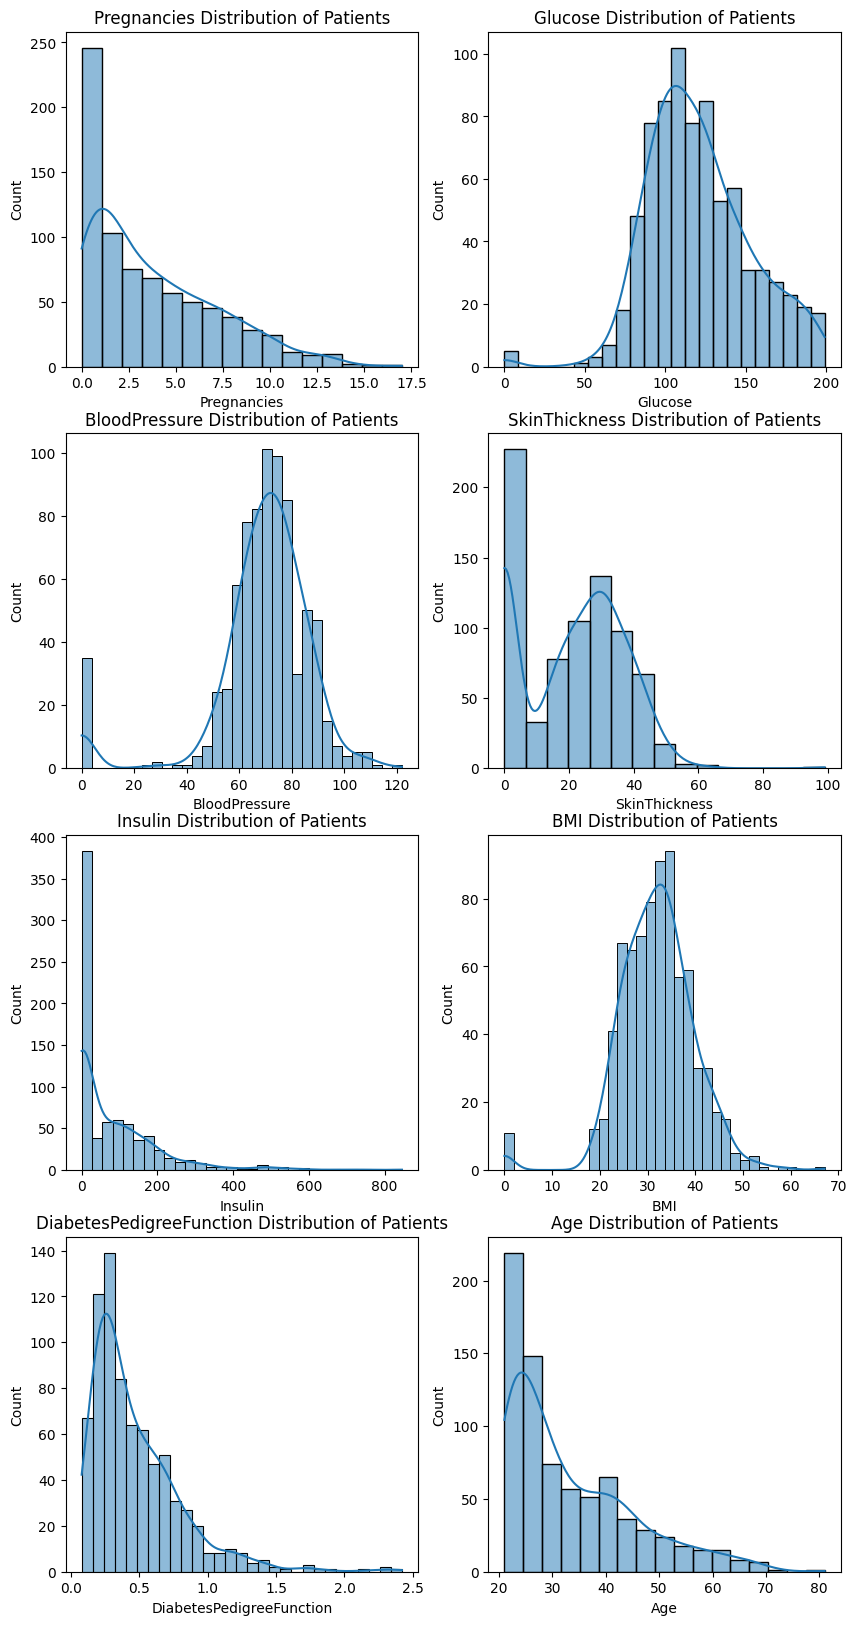

In [118]:
show_plot('hist')

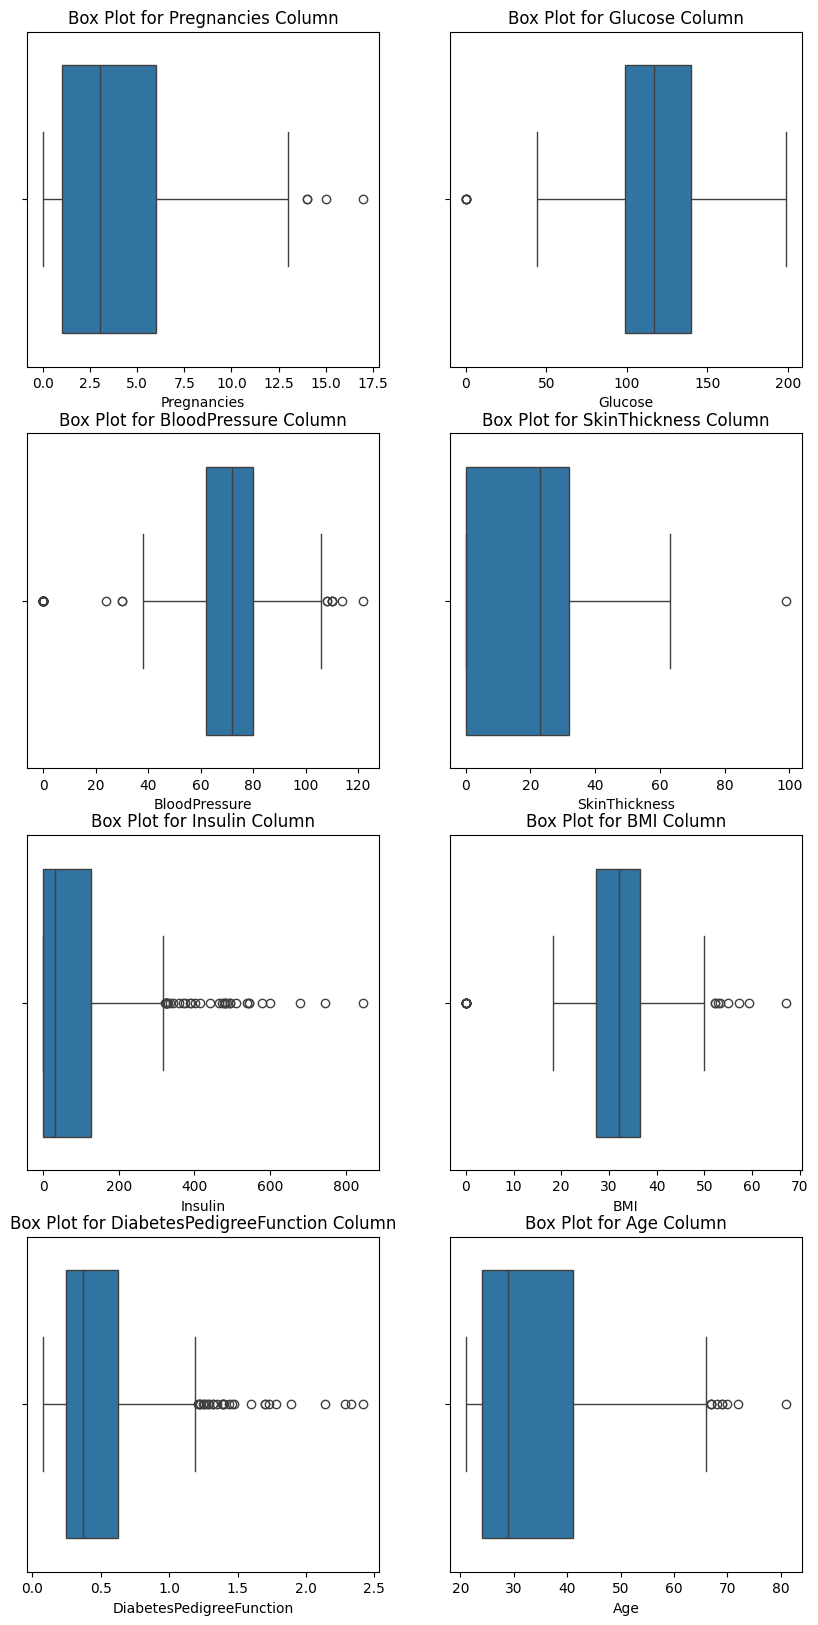

In [119]:
show_plot('box')

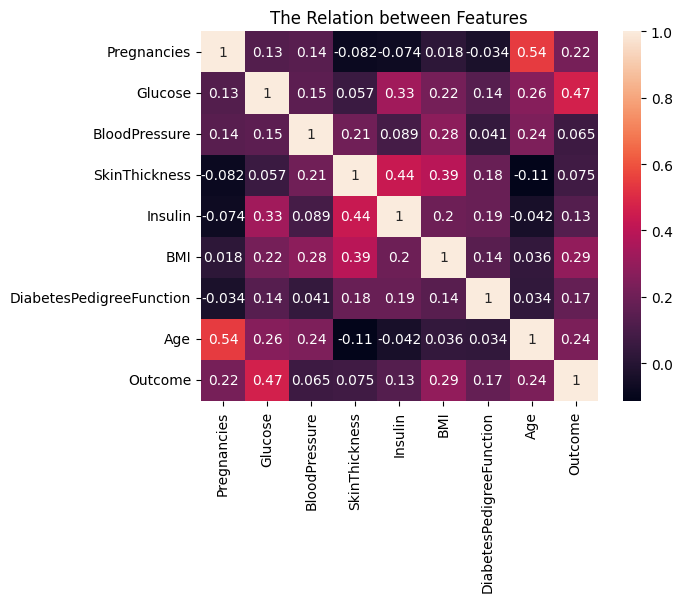

In [120]:
sns.heatmap(df.corr(),annot=True)
plt.title('The Relation between Features')
plt.show()

In [121]:
mean_values=df.groupby('Outcome').mean().T
mean_values

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


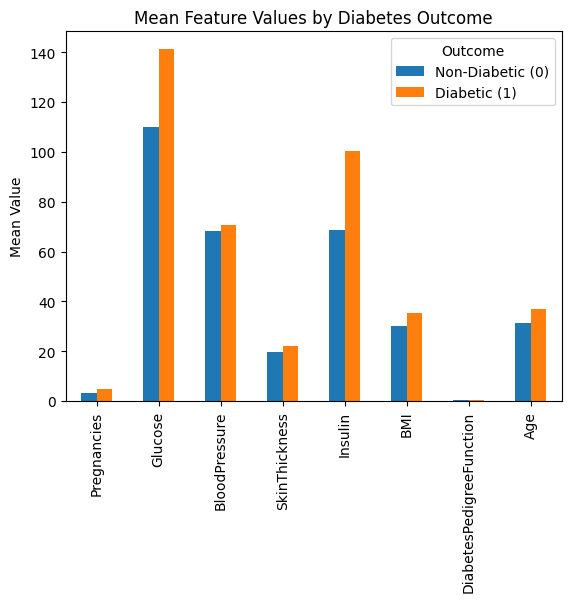

In [122]:
mean_values.plot(kind="bar")
plt.title("Mean Feature Values by Diabetes Outcome")
plt.ylabel("Mean Value")
plt.xticks(rotation=90)
plt.legend(title="Outcome", labels=["Non-Diabetic (0)", "Diabetic (1)"])
plt.show()

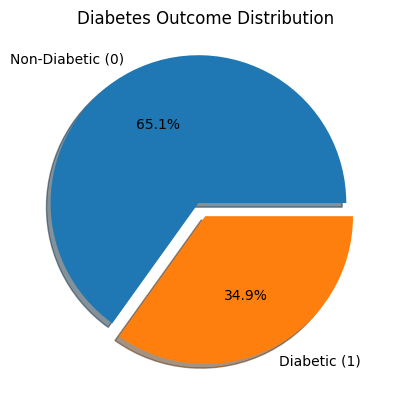

In [123]:
plt.pie(df['Outcome'].value_counts(),labels=["Non-Diabetic (0)", "Diabetic (1)"],shadow=True,autopct="%1.1f%%",explode=[0.1,0])
plt.title("Diabetes Outcome Distribution")
plt.show()

#Training Models

In [124]:
#split the dataset to features and target
X = df.drop('Outcome',axis=1)
y = df['Outcome']

**The dataset is imbalanced, so we will apply the RandomOverSampler algorithm to achieve class balance.**

In [125]:
ros = RandomOverSampler(random_state=11)
X, y = ros.fit_resample(X, y)

In [126]:
y.value_counts()

,count
Outcome,
1,500
0,500


In [127]:
#split the dataset into train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

## logitstic Regrssion

In [133]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))

Model Accuracy: 0.7250

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76       109
           1       0.71      0.66      0.69        91

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200


Confusion Matrix:
[[85 24]
 [31 60]]


## Random Forest

In [129]:
rf_model = RandomForestClassifier(n_estimators=100,class_weight="balanced",random_state=11)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

Model Accuracy: 0.8650

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       109
           1       0.83      0.89      0.86        91

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200


Confusion Matrix:
[[92 17]
 [10 81]]


# Choosing Model

**Since Random Forest has higher accuracy than Logistic Regression and a lower false negative rate, we will choose Random Forest.**

In [130]:
joblib.dump(rf_model, "diabetes_model.joblib")

['diabetes_model.joblib']